In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from knn_classifier import KNNClassifier
from train_test_split import train_test_split
from scaler import MinMaxScaler, StandardScaler, RobustScaler
from metric import accuracy, f1_score

In [2]:
df = pd.read_csv("data/cancer.csv")
df.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


In [4]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    print(f"\nTrain with {scaler_name}:")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_values = range(1, 21)
    acc_scores = []
    f1_scores = []

    for k in k_values:
        knn = KNNClassifier(k, 3)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        acc_scores.append(accuracy(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    results[scaler_name] = {
        "k_values": k_values,
        "accuracy": acc_scores,
        "f1_score": f1_scores,
        "best_k": k_values[np.argmax(acc_scores)],
        "best_accuracy": max(acc_scores),
        "best_f1": max(f1_scores)
    }

    print(f"Best k: {results[scaler_name]['best_k']}, Accuracy: {results[scaler_name]['best_accuracy']:.4f}, F1-score: {results[scaler_name]['best_f1']:.4f}")


Train with MinMaxScaler:
Best k: 7, Accuracy: 0.9529, F1-score: 0.9510

Train with StandardScaler:
Best k: 3, Accuracy: 0.9471, F1-score: 0.9450

Train with RobustScaler:
Best k: 3, Accuracy: 0.9529, F1-score: 0.9510


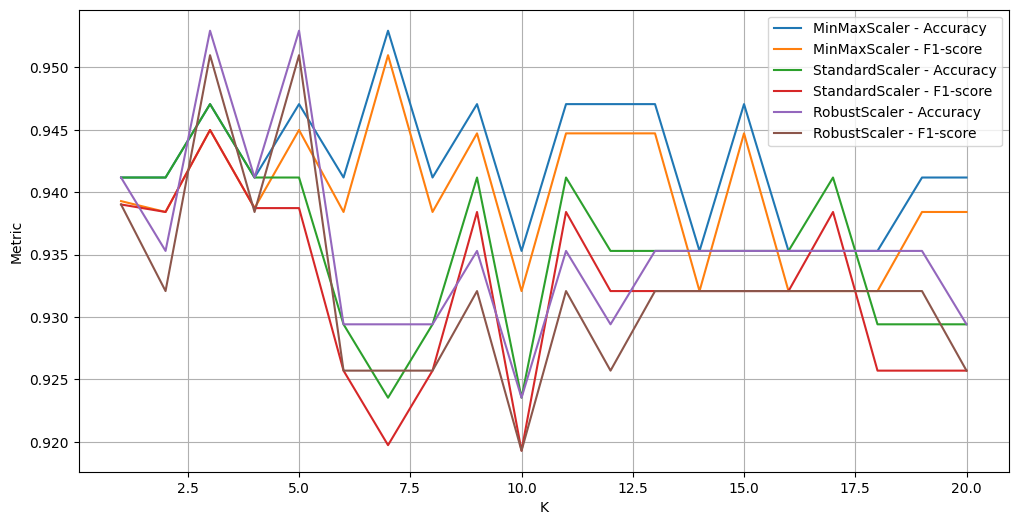

In [5]:
plt.figure(figsize=(12, 6))

for scaler_name, data in results.items():
    plt.plot(data["k_values"], data["accuracy"], label=f"{scaler_name} - Accuracy")
    plt.plot(data["k_values"], data["f1_score"], label=f"{scaler_name} - F1-score")

plt.xlabel("K")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.show()
